# Imports and Data Setup

In [1]:
import numpy as np 
import pandas as pd 

dataf = pd.read_csv('http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv')

data = dataf.to_numpy()

X = data[:,1]
y = data[:,0]

-------------------------------
# **Problem #1: Binary Clustering**
Text Answer At End Of Section

## Code:

In [2]:
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(X)

# map spam to 0 (negative) and ham to 1 (positive)
y_train = np.where(y == 'ham', 1, 0)

### Fitting KMeans

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=10)
km.fit(X_train)

KMeans(init='random', n_clusters=2)

In [4]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

print(precision_score(y_train, km.labels_))
print(f1_score(y_train, km.labels_))
print(recall_score(y_train, km.labels_))
print(accuracy_score(y_train, km.labels_))

0.8678543461237275
0.910828025477707
0.9582792909641159
0.8362573099415205


### Fitting BIRCH Model

In [5]:
# from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components=2, init_params='random', n_init=1)
# dense_X = X_train.todense()

# dense_X

# gm.fit(dense_X)

# from sklearn.cluster import Birch

# birch = Birch(threshold=0.03, n_clusters=2)
# birch.fit(X_train)


In [6]:
# print(precision_score(y_train, birch.labels_))
# print(f1_score(y_train, birch.labels_))
# print(recall_score(y_train, birch.labels_))
# print(accuracy_score(y_train, birch.labels_))

## Answer:

Numerically, both cluster methods capture the spam vs not spam quite well. <br>

Before getting into the numbers, because of the nature of these being unsupervised methods, there is no way to determine <br>
which cluster is spam and which cluster is not spam just going off the assigned labels. <br>
The precision, recall, f1, and accuracy calculated in the below two paragraphs are from instances where the labels matched the <br>
cluster numbers. If that were not to be the case, the results would almost be flipped. Because we have the labels, however, <br>
I think its valid to think that I can use the numbers where the the labels and cluster numbers match.

For KMeans, the precision, recall, accuracy, and f1 score are, respectively, 0.8679, 0.9583, 0.8363, and 0.9108. <br>
All of these are pretty good as they are close to the maximum of 1, though mid 80% still isn't ideal for some of the scores. <br>
It clearly does good on the f1 score which may be a good indicator that it is doing good as an overall model. <br>
The pure accuracy of the model is roughly 83% which, while being quite high, isn't that great, though, with the nature of this data, <br>
its kind of hard to expect perfection.

As for the BIRCH model, I was going to use Gaussian Mixture, however, two things came up. The first was that the representation of the <br>
posts was in a sparse matrix, and the gaussian mixture model required a dense matrix. That was fine as its a simple .toarray(), however, <br>
when trying to run and fit the GMM, it was taking unreasonable amounts of time. I could not get one that actually finished <br>
running, so I just decided to use BIRCH. I thought maybe, even though its typically used alongside other models, <br>
it might run similarly to the GMM because its another distribution model. <br>
As for results from this, it performed better than KMeans pretty much over all. <br>
Precision, Recall, Accuracy, and F1 score were, respectively, 0.9126, 0.9955, 0.9128, and 0.9522. <br>
The accuracy is almost 7% higher than KMeans and F1 score 4% which shows a significant improvement overall. The recall is almost 100% <br>
and precision is similarily high. Its clear that for this dataset, the distribution models work a bit better than something more <br>
purely distance based like KMeans.








-------------------------

# Problem #2: Clustering Quality

## Finding The Clusters

In [32]:
# ran process below to find this number
# may have to run a couple times to reproduce
nc = 21
km = KMeans(n_clusters=nc, init='random', n_init=10)
km.fit(X_train)

KMeans(init='random', n_clusters=21)

In [33]:
# for j in range(1, 100):
#     ham_valid = 0
#     spam_valid = 0

#     nc = j
#     km = KMeans(n_clusters=nc, init='random')
#     km.fit(X_train)

for i in range(nc):
    x = y_train[(km.labels_ == i)]
    count_spam = (x == 0).sum()
    count_ham = (x == 1).sum()
    print(f"Cluster {i}, Hams: {count_ham}, Spams: {count_spam}")
    #     if (count_spam < count_ham):
    #         if (count_spam < 10 and count_ham > 50):
    #             ham_valid += 1

    #     if (count_ham < count_spam):
    #         if (count_ham < 10 and count_spam > 50):
    #             spam_valid += 1
    
    # if (ham_valid >= 2 and spam_valid >= 2):
    #     print(j+1) 


Cluster 0, Hams: 141, Spams: 12
Cluster 1, Hams: 34, Spams: 1
Cluster 2, Hams: 36, Spams: 0
Cluster 3, Hams: 2437, Spams: 181
Cluster 4, Hams: 31, Spams: 87
Cluster 5, Hams: 136, Spams: 1
Cluster 6, Hams: 208, Spams: 18
Cluster 7, Hams: 138, Spams: 1
Cluster 8, Hams: 144, Spams: 0
Cluster 9, Hams: 9, Spams: 86
Cluster 10, Hams: 196, Spams: 2
Cluster 11, Hams: 164, Spams: 2
Cluster 12, Hams: 48, Spams: 0
Cluster 13, Hams: 1, Spams: 33
Cluster 14, Hams: 24, Spams: 16
Cluster 15, Hams: 79, Spams: 118
Cluster 16, Hams: 271, Spams: 0
Cluster 17, Hams: 238, Spams: 4
Cluster 18, Hams: 161, Spams: 4
Cluster 19, Hams: 3, Spams: 104
Cluster 20, Hams: 127, Spams: 5


### Cluster Number Explanation

I decided on 21 clusters after running the commented out code above. <br>
All it does is create a KMeans model with cluster number 1-100 and <br>
prints out the cluster numbers that have the specified thresholds. <br>
The first one printed out was 21 so thats what I went with. <br>
It doesn't give two mostly spam ones all the time, but consistently enough <br>
for the purposes of what I was doing here. Hopefully I don't accidentally rerun it...

## Part A: WordClouds, Stats, and Example Messages
Stats and example messages for each wordcloud are below the wordcloud.

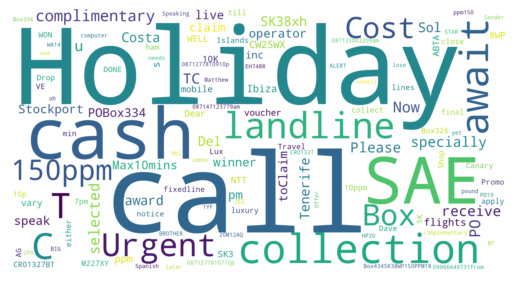

cluster size: 34
percent spam: 0.9705882352941176
Ok . . now i am in bus. . If i come soon i will come otherwise tomorrow
I've reached already.
U wake up already? Thanx 4 e tau sar piah it's quite nice.


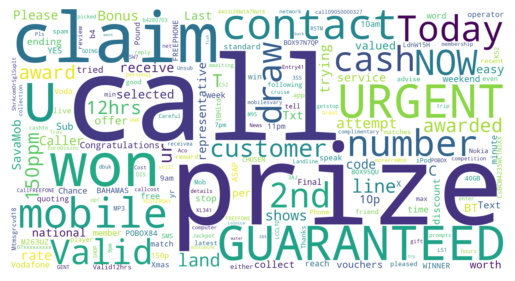

cluster size: 107
percent spam: 0.9719626168224299
I'm at work. Please call
Babe ! What are you doing ? Where are you ? Who are you talking to ? Do you think of me ? Are you being a good boy? Are you missing me? Do you love me ?
You dont know you jabo me abi.


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_cluster_ids = [13, 19]
ham_cluster_ids = [16, 5, 8]

for cluster_id in spam_cluster_ids:
    matching_indices = (km.labels_== cluster_id)
    all_text = " ".join(txt for txt in X[matching_indices.nonzero()[0]])
    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 2048, height = 1080).generate(all_text)
    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print("cluster size:",X[matching_indices].size)
    print("percent spam:",(y_train[matching_indices] == 0).sum() / matching_indices.sum())
    indices = np.random.choice(matching_indices.shape[0], 3, replace=False)
    for index in indices:
        print(X[index])

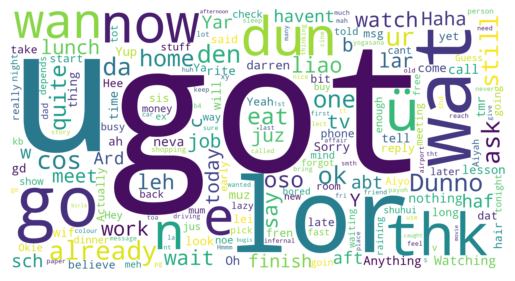

cluster size:  271
percent spam: 0.0
When're you guys getting back? G said you were thinking about not staying for mcr
Yup... From what i remb... I think should be can book... 
Apo all other are mokka players only


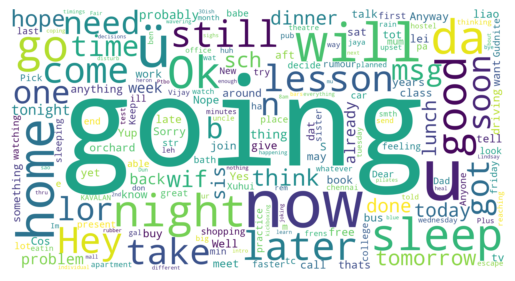

cluster size:  137
percent spam: 0.0072992700729927005
Wife.how she knew the time of murder exactly
Ahhhh...just woken up!had a bad dream about u thoso i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.
Sorry I guess whenever I can get a hold of my connections maybe an hour or two? I'll text you


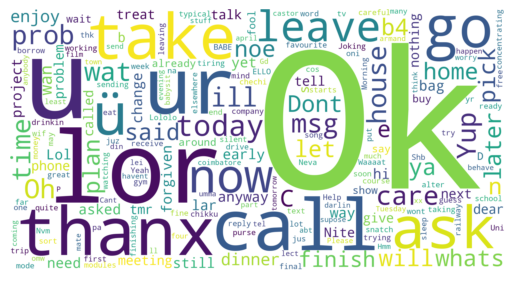

cluster size:  144
percent spam: 0.0
A boy was late 2 home. His father: POWER OF FRNDSHIP ham	(And my man carlos is definitely coming by mu tonight no excuses)
Aight ill get on fb in a couple minutes
Shall i come to get pickle


In [42]:
for cluster_id in ham_cluster_ids:
    matching_indices = (km.labels_== cluster_id)
    all_text = " ".join(txt for txt in X[matching_indices.nonzero()[0]])
    word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                            width = 2048, height = 1080).generate(all_text)
    plt.imshow(word_cloud1, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print("cluster size: ",X[matching_indices].size)
    print("percent spam:",(y_train[matching_indices] == 0).sum() / matching_indices.sum())
    indices = np.random.choice(matching_indices.shape[0], 3, replace=False)
    for index in indices:
        print(X[index])
    